# Análise de Dados com Python

### Desafio:

Você trabalha em uma empresa do varejo e tem milhares de clientes diferentes.

Com o objetivo de aumentar o faturamento e o lucro da sua empresa, a diretoria quer conseguir identificar quem é o cliente ideal para seus produtos, baseado no histórico de compras dos clientes.

Para isso, ela fez um trabalho de classificar os clientes com uma nota de 1 a 100. Só que agora, sobrou para você conseguir, a partir dessa nota, descobrir qual o perfil de cliente ideal da empresa.

Qual a profissão? Qual a idade? Qual a faixa de renda? E todas as informações que você puder analisar para dizer qual o cliente ideal da empresa.

Base de Dados: https://drive.google.com/drive/folders/1XvNLDKVH7TUS8HdH4r0TkXL__MFpoc3e?usp=share_link

In [20]:
# Passo 1: Importar base de dados
import pandas as pd

tabela = pd.read_csv("clientes.csv", encoding = "latin", sep = ";")

# Deletar a coluna inútil
tabela = tabela.drop("Unnamed: 8", axis = 1)
# Passo 2: Visualizar a base de dados
# - Descobrir as informações disponíveis
# - Descobrir os problemas da base dados
display(tabela)

,ClienteID,Origem,Idade,Salário Anual (R$),Nota (1-100),Profissão,Experiência Trabalho,Tamanho Família
0,1,Normal,19,15000,39,Saúde,1,4
1,2,Normal,21,35000,81,Engenheiro,3,3
2,3,Promoção,20,86000,2,Engenheiro,1,1
3,4,Promoção,23,59000,73,Advogado,0,2
4,5,Promoção,31,38000,48,Entretenimento,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Promoção,71,184387,48,Artista,8,7
1996,1997,Promoção,91,73158,28,Doutor,7,7
1997,1998,Normal,87,90961,14,Saúde,9,2
1998,1999,Normal,77,182109,4,Executivo,7,2


In [30]:
# Passo 3: Tratamento de dados

# - Valores reconhecidos de maneira incorreta
tabela["Salário Anual (R$)"] = pd.to_numeric(tabela["Salário Anual (R$)"], errors="coerce")
# - Valores vazios
tabela = tabela.dropna()
print(tabela.info())
#display(tabela[tabela["Profissão"], isna()])



<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClienteID             1965 non-null   int64  
 1   Origem                1965 non-null   object 
 2   Idade                 1965 non-null   int64  
 3   Salário Anual (R$)    1965 non-null   float64
 4   Nota (1-100)          1965 non-null   int64  
 5   Profissão             1965 non-null   object 
 6   Experiência Trabalho  1965 non-null   int64  
 7   Tamanho Família       1965 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 138.2+ KB
None


In [34]:
# Passo 4: Análise inicial
display(tabela.describe())

,ClienteID,Idade,Salário Anual (R$),Nota (1-100),Experiência Trabalho,Tamanho Família
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,52.385242,3.675318,3.757252
std,578.443714,28.414889,45833.860195,28.593269,3.909676,1.968335
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,29.000000,0.000000,2.000000
50%,1000.000000,48.000000,109759.000000,52.000000,1.000000,4.000000
75%,1502.000000,73.000000,149095.000000,77.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


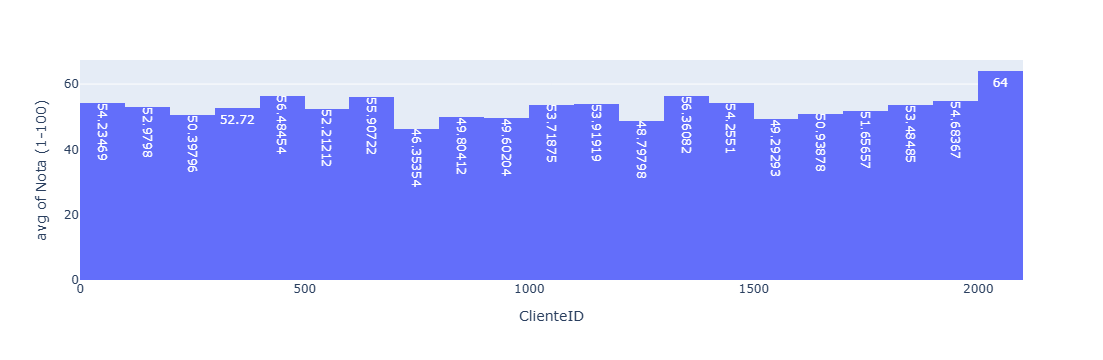

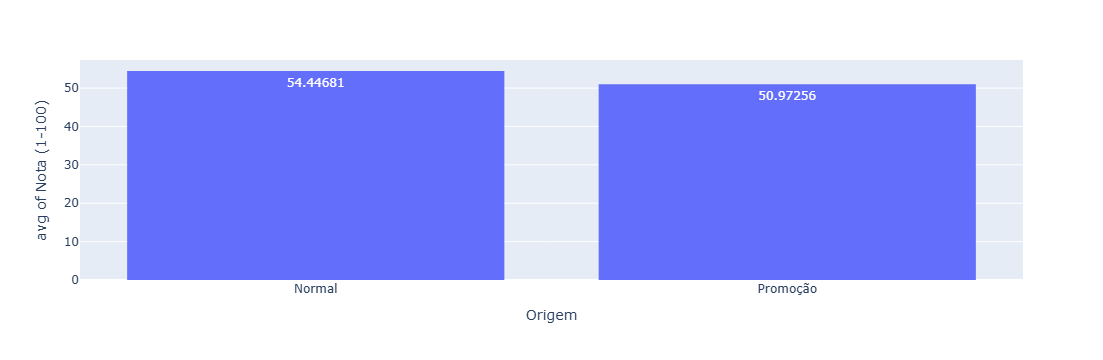

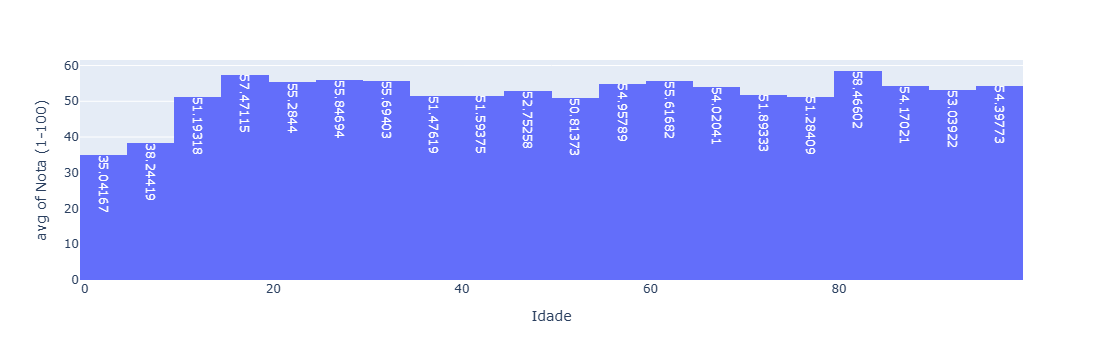

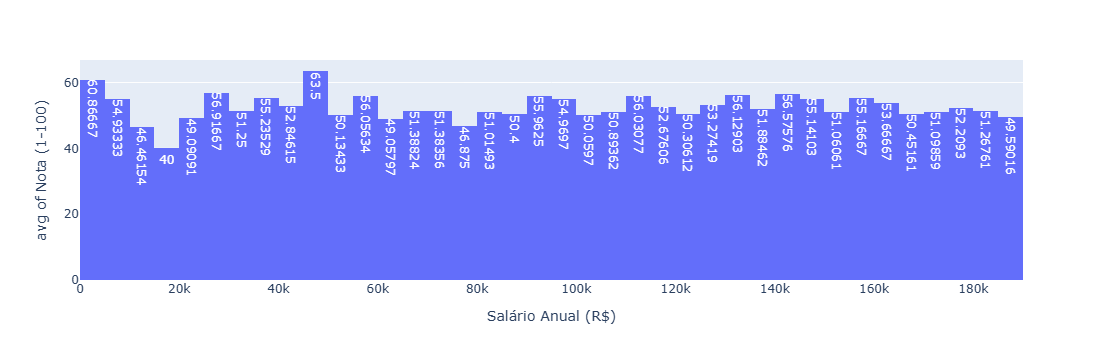

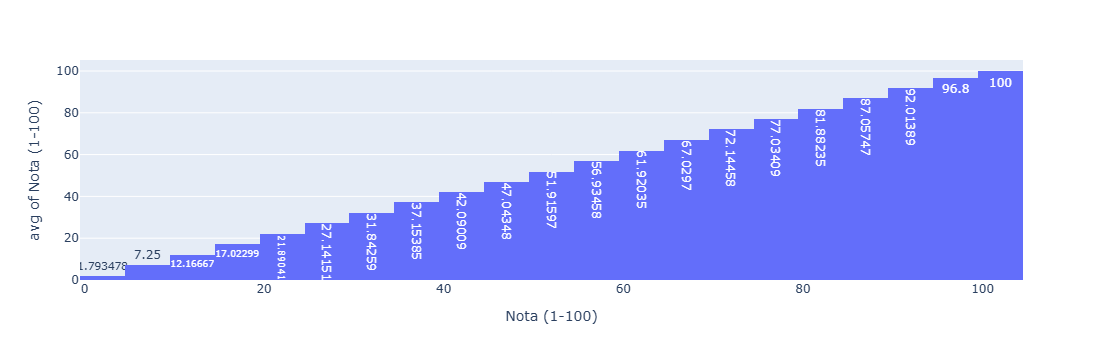

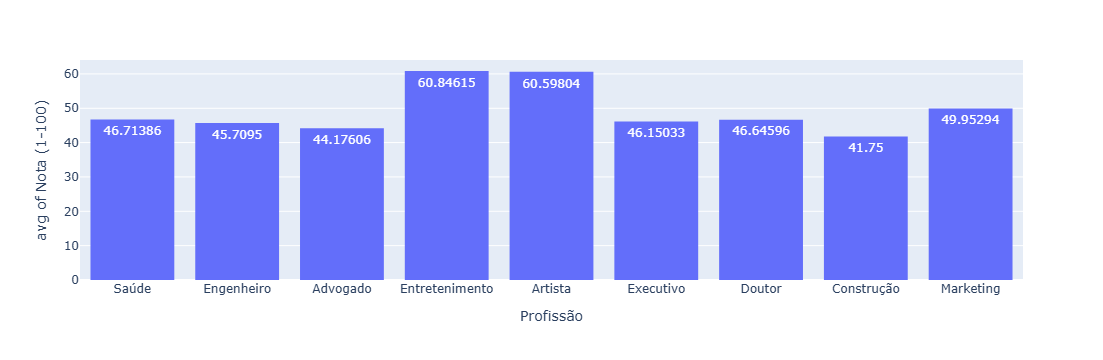

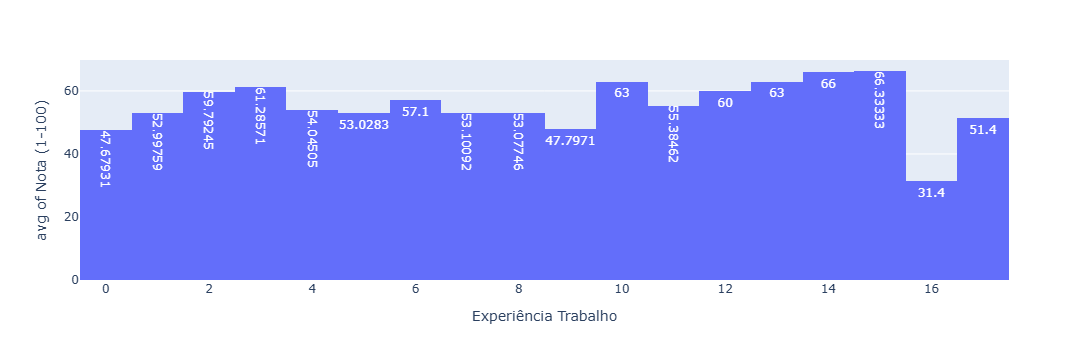

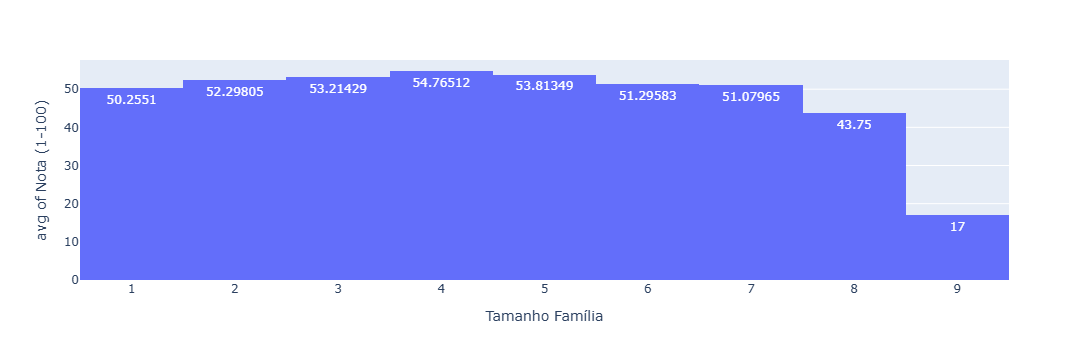

In [44]:
# Passo 5: Análise mais completa
import plotly.express as px

# Cria o gráfico

for coluna in tabela.columns:
    grafico = px.histogram(tabela, x = coluna, y = "Nota (1-100)", histfunc = "avg", text_auto=True)
    # Exibe o gráfico
    grafico.show()

Perfil ideal de cliente:
Acima de 15 anos, pois após essa faixa etária não há muita diferença de nota;
Faixa salarial não parece relevante;
Clientes da área de entretenimento e artistica estão com notas acima da média, enquanto quem trabalha com construção está abaixo;
Pessoas que tem entre 10-15 anos de experiência no trabalho se destacam;
Clientes com famílias com mais de 7 membros não são tão bons